<a href="https://colab.research.google.com/github/Virum9520/Ensemble-Methods-on-Kyphosis-Dataset/blob/main/Decision_Trees_%26_Random_Forest_on_Kyphosis_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Decision Trees and Random Forests in Python

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('kyphosis.csv')

In [ ]:
df.head()

#Age is in Months

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


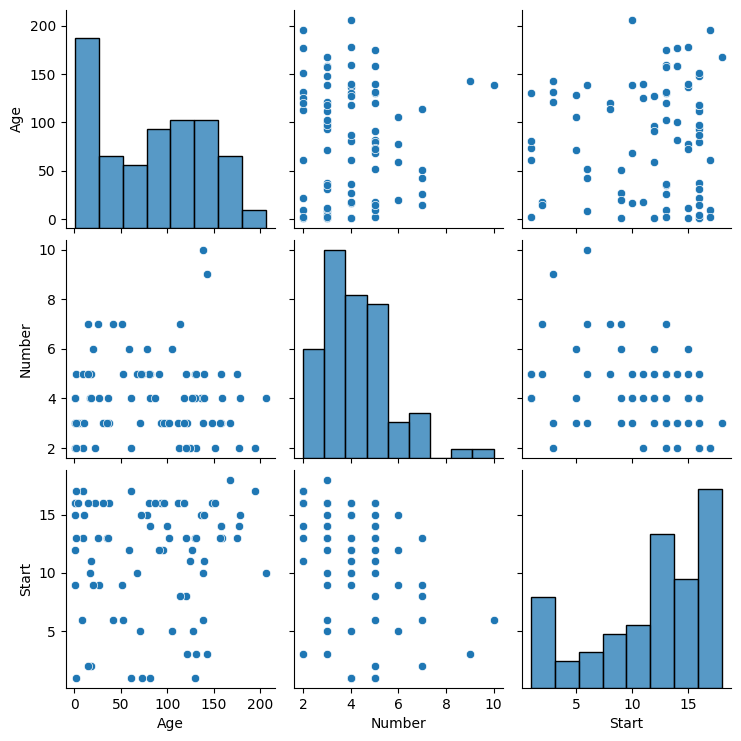

In [ ]:
sns.pairplot(df)

#Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier()

In [ ]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

#Prediction and Evaluation

In [ ]:
predictions = tree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.94      0.89      0.92        19
     present       0.71      0.83      0.77         6

    accuracy                           0.88        25
   macro avg       0.83      0.86      0.84        25
weighted avg       0.89      0.88      0.88        25



In [ ]:
print(confusion_matrix(y_test,predictions))

[[17  2]
 [ 1  5]]


#Tree Visualization

In [ ]:
from sklearn.tree import plot_tree

<function matplotlib.pyplot.show(close=None, block=None)>

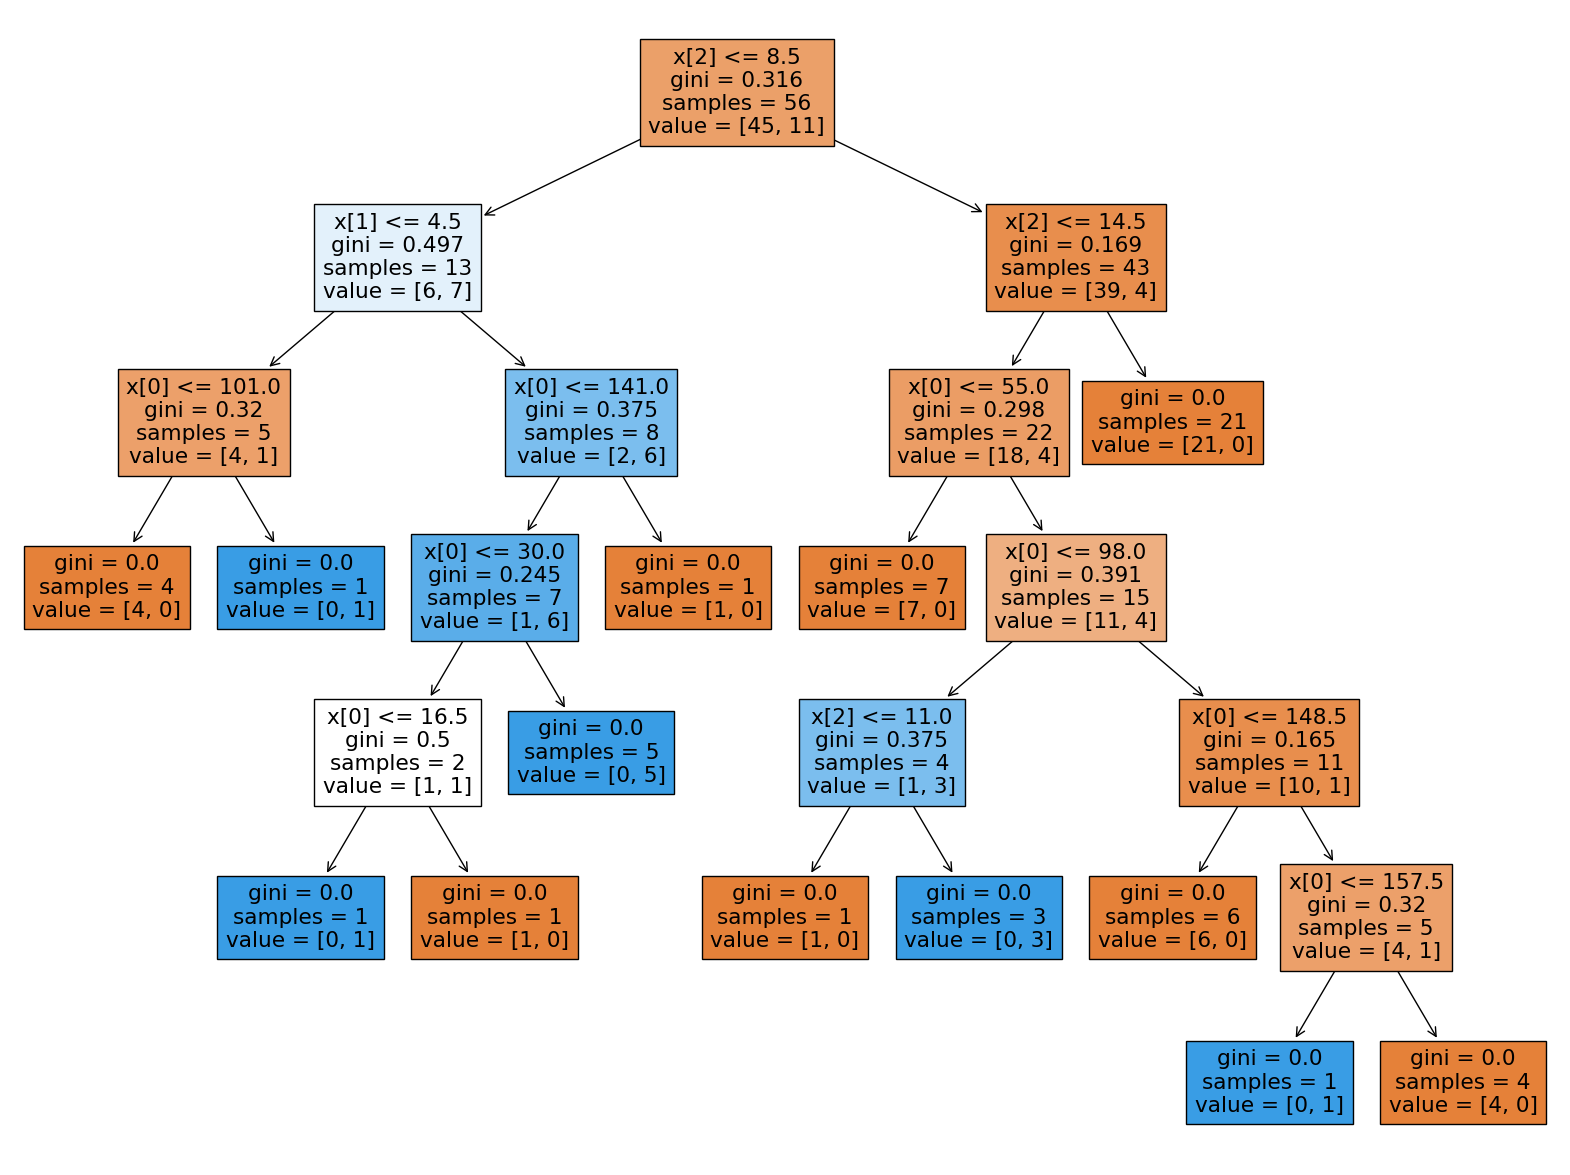

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(tree,filled=True)
plt.show

#Random Forests

In [ ]:
df.Kyphosis.value_counts()

#We get a highly imbalanced class label
#Hence we use Random Forest Classifier for performing Ensemble Method

absent     64
present    17
Name: Kyphosis, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
Rf = RandomForestClassifier(n_estimators=200)

In [ ]:
Rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
Rf_pred = Rf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,Rf_pred))

[[18  1]
 [ 4  2]]


In [ ]:
print(classification_report(y_test,Rf_pred))

              precision    recall  f1-score   support

      absent       0.82      0.95      0.88        19
     present       0.67      0.33      0.44         6

    accuracy                           0.80        25
   macro avg       0.74      0.64      0.66        25
weighted avg       0.78      0.80      0.77        25

